In [16]:
#IMPORTING THE LIBRARIES

from keras.callbacks import EarlyStopping
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator 

In [17]:
#USING IMAGE DATA GENERATOR

train_datagen = ImageDataGenerator(rescale=1/255,
                            rotation_range=60,
                            width_shift_range=0.2,
                            height_shift_range=0.4,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            fill_mode='reflect',
                            brightness_range=[0.4,1.5]                   
) 

test_datagen=ImageDataGenerator(rescale=1/255)

In [4]:
train_generator=train_datagen.flow_from_directory("train",
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode="binary")

validation_generator=train_datagen.flow_from_directory("validation",
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Using a traditional CNN

In [6]:

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(16,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy" , metrics="accuracy")

early=EarlyStopping(monitor="val_accuracy", patience=10 , mode="max")

history=model.fit(train_generator,steps_per_epoch=2000//32,epochs=100,validation_data=validation_generator,
                  validation_steps=1000//32, callbacks=[early])

Epoch 1/100
62/62 [==============================] - 39s 598ms/step - loss: 2.0811 - accuracy: 0.5183 - val_loss: 0.6949 - val_accuracy: 0.5060
Epoch 2/100
62/62 [==============================] - 33s 525ms/step - loss: 0.7506 - accuracy: 0.5539 - val_loss: 0.7206 - val_accuracy: 0.5010
Epoch 3/100
62/62 [==============================] - 34s 548ms/step - loss: 0.7128 - accuracy: 0.5498 - val_loss: 0.8735 - val_accuracy: 0.5000
Epoch 4/100
62/62 [==============================] - 33s 533ms/step - loss: 0.6977 - accuracy: 0.5630 - val_loss: 0.7986 - val_accuracy: 0.5010
Epoch 5/100
62/62 [==============================] - 34s 547ms/step - loss: 0.6957 - accuracy: 0.5686 - val_loss: 1.1985 - val_accuracy: 0.5000
Epoch 6/100
62/62 [==============================] - 35s 565ms/step - loss: 0.6694 - accuracy: 0.5854 - val_loss: 0.8737 - val_accuracy: 0.4950
Epoch 7/100
62/62 [==============================] - 33s 535ms/step - loss: 0.6790 - accuracy: 0.5767 - val_loss: 0.7715 - val_accuracy:

62/62 [==============================] - 32s 511ms/step - loss: 0.5701 - accuracy: 0.6997 - val_loss: 0.5935 - val_accuracy: 0.6694
Epoch 58/100
62/62 [==============================] - 32s 512ms/step - loss: 0.5682 - accuracy: 0.6946 - val_loss: 0.6029 - val_accuracy: 0.6764
Epoch 59/100
62/62 [==============================] - 32s 517ms/step - loss: 0.5865 - accuracy: 0.6819 - val_loss: 0.6297 - val_accuracy: 0.6583
Epoch 60/100
62/62 [==============================] - 32s 512ms/step - loss: 0.5820 - accuracy: 0.6794 - val_loss: 0.6492 - val_accuracy: 0.6290
Epoch 61/100
62/62 [==============================] - 30s 488ms/step - loss: 0.5674 - accuracy: 0.7033 - val_loss: 0.6160 - val_accuracy: 0.6623


In [7]:
#EVALUATING THE TRAINED MODEL

test_generator=test_datagen.flow_from_directory("test",
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode="binary")


model.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
32/32 [==============================] - 3s 103ms/step - loss: 0.6062 - accuracy: 0.6750


[0.6061655282974243, 0.675000011920929]

In [ ]:
#SAVING THE MODEL

model.save("modelo_traditional.h5")

# Using Transfer Learning

In [9]:
train_generator_resize=train_datagen.flow_from_directory("train",
                                  target_size=(150,150),
                                  batch_size=32,
                                  color_mode="rgb",
                                  subset="training",
                                  class_mode="binary")


validation_generator_resize=test_datagen.flow_from_directory("validation",
                                  target_size=(150,150),
                                  batch_size=32,
                                  color_mode="rgb",
                                  class_mode="binary")


test_generator_resize=test_datagen.flow_from_directory("test",
                                  target_size=(150,150),
                                  batch_size=32,
                                  color_mode="rgb",
                                  class_mode="binary",
                                  shuffle=False)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
import tensorflow as tf

from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model=InceptionV3(
    include_top=False,
    input_tensor=tf.keras.layers.Input(shape=(150,150,3))
)

for layer in pre_trained_model.layers:
  layer.trainable=False

87910968/87910968 [==============================] - 23s 0us/step


In [11]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                       

 batch_normalization_14 (BatchN  (None, 16, 16, 96)  288         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_15 (BatchN  (None, 16, 16, 32)  96          ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_11[0][0]'] 
                                                                                                  
 activatio

 conv2d_24 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_27 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_24 (BatchN  (None, 16, 16, 48)  144         ['conv2d_24[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_27 (BatchN  (None, 16, 16, 96)  288         ['conv2d_27[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_38 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_38 (BatchN  (None, 7, 7, 128)   384         ['conv2d_38[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_38[0][0]'] 
                                                                                                  
 conv2d_39 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_48[0][0]'] 
                                                                                                  
 conv2d_49 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_49 (BatchN  (None, 7, 7, 160)   480         ['conv2d_49[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_49[0][0]'] 
                                                                                                  
 conv2d_45

 batch_normalization_59 (BatchN  (None, 7, 7, 160)   480         ['conv2d_59[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_59[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_60 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalizat

 conv2d_65 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 7, 7, 192)   576         ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_70 (BatchN  (None, 7, 7, 192)   576         ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_78 (BatchN  (None, 7, 7, 192)   576         ['conv2d_78[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 conv2d_75 (Conv2D)             (None, 3, 3, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 batch_normalization_88 (BatchN  (None, 3, 3, 192)   576         ['conv2d_88[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_80[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_89[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [12]:
last_layers=pre_trained_model.get_layer("mixed7")
last_output=last_layers.output

In [13]:
last_layers.output

<KerasTensor: shape=(None, 7, 7, 768) dtype=float32 (created by layer 'mixed7')>

In [14]:
x=tf.keras.layers.Flatten()(last_output)
x=tf.keras.layers.Dense(128,activation="relu")(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(1,activation="sigmoid")(x)


model_keras=tf.keras.Model(pre_trained_model.input,x)

model_keras.compile(optimizer="adam", loss="binary_crossentropy",metrics="accuracy")

model_keras.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                              

 batch_normalization_14 (BatchN  (None, 16, 16, 96)  288         ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_15 (BatchN  (None, 16, 16, 32)  96          ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_11[0][0]'] 
                                                                                                  
 activatio

 conv2d_24 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_27 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_24 (BatchN  (None, 16, 16, 48)  144         ['conv2d_24[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_27 (BatchN  (None, 16, 16, 96)  288         ['conv2d_27[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_38 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_38 (BatchN  (None, 7, 7, 128)   384         ['conv2d_38[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_38[0][0]'] 
                                                                                                  
 conv2d_39 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_48[0][0]'] 
                                                                                                  
 conv2d_49 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_49 (BatchN  (None, 7, 7, 160)   480         ['conv2d_49[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_49[0][0]'] 
                                                                                                  
 conv2d_45

 batch_normalization_59 (BatchN  (None, 7, 7, 160)   480         ['conv2d_59[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_59[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_60 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalizat

 conv2d_65 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_70 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 7, 7, 192)   576         ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_70 (BatchN  (None, 7, 7, 192)   576         ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

In [15]:
history_keras=model_keras.fit(train_generator_resize,epochs=10,validation_data=validation_generator_resize)

Epoch 1/10
63/63 [==============================] - 33s 469ms/step - loss: 0.6278 - accuracy: 0.7135 - val_loss: 0.1621 - val_accuracy: 0.9340
Epoch 2/10
63/63 [==============================] - 28s 448ms/step - loss: 0.3658 - accuracy: 0.8300 - val_loss: 0.1267 - val_accuracy: 0.9510
Epoch 3/10
63/63 [==============================] - 28s 450ms/step - loss: 0.3379 - accuracy: 0.8535 - val_loss: 0.1283 - val_accuracy: 0.9510
Epoch 4/10
63/63 [==============================] - 29s 453ms/step - loss: 0.3375 - accuracy: 0.8475 - val_loss: 0.1244 - val_accuracy: 0.9470
Epoch 5/10
63/63 [==============================] - 29s 462ms/step - loss: 0.3132 - accuracy: 0.8635 - val_loss: 0.1331 - val_accuracy: 0.9450
Epoch 6/10
63/63 [==============================] - 29s 464ms/step - loss: 0.3274 - accuracy: 0.8625 - val_loss: 0.1240 - val_accuracy: 0.9530
Epoch 7/10
63/63 [==============================] - 28s 446ms/step - loss: 0.3074 - accuracy: 0.8645 - val_loss: 0.1179 - val_accuracy: 0.9450

In [18]:
#EVALUATING THE TRAINED MODEL

model_keras.evaluate(test_generator_resize)

32/32 [==============================] - 7s 218ms/step - loss: 0.1189 - accuracy: 0.9470


[0.1189359575510025, 0.9470000267028809]

In [19]:
#SAVING THE MODEL

model_keras.save("model_inception.h5")

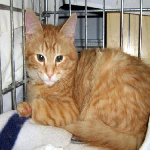

In [34]:
#MAKING PREDICTIONS

from tensorflow.keras.utils  import array_to_img,img_to_array,load_img
import os
import numpy as np
ruta=os.listdir("test/cats")[69]
ruta2="test/cats/"+ruta
imagen=load_img(ruta2,target_size=(150,150,3))
imagen

In [35]:
nueva_imagen=img_to_array(imagen)

nueva_imagen=np.expand_dims(nueva_imagen,axis=0)

pre=test_datagen.flow(nueva_imagen)

np.round(model_keras.predict(pre))

1/1 [==============================] - 1s 1s/step


array([[0.]], dtype=float32)

In [36]:
test_generator_resize.class_indices

{'cats': 0, 'dogs': 1}

# Using TensorFlow Hub

In [38]:
!pip install tensorflow_hub

     ------------------------------------ 108.8/108.8 kB 631.9 kB/s eta 0:00:00


In [39]:
import tensorflow_hub as hub

In [40]:
module_url="https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"

In [41]:
model_hub=tf.keras.Sequential([
                                tf.keras.layers.InputLayer(input_shape=(150,150,3)),
                                hub.KerasLayer(module_url,trainable=False),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(128,activation="relu"),
                                tf.keras.layers.Dropout(0.2),
                                tf.keras.layers.Dense(1,activation="sigmoid")

])


model_hub.build((None,150,150,3))

model_hub.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1343049   
                                                                 
 flatten_3 (Flatten)         (None, 1001)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               128256    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,471,434
Trainable params: 128,385
Non-trainable params: 1,343,049
_________________________________________________________________


In [42]:
model_hub.compile(optimizer="adam", loss="binary_crossentropy",metrics="accuracy")

history_hub=model_hub.fit(train_generator_resize,epochs=10,validation_data=validation_generator_resize)

Epoch 1/10
63/63 [==============================] - 22s 318ms/step - loss: 0.6331 - accuracy: 0.7875 - val_loss: 0.1943 - val_accuracy: 0.9220
Epoch 2/10
63/63 [==============================] - 20s 314ms/step - loss: 0.3896 - accuracy: 0.8295 - val_loss: 0.1730 - val_accuracy: 0.9290
Epoch 3/10
63/63 [==============================] - 20s 317ms/step - loss: 0.3754 - accuracy: 0.8355 - val_loss: 0.2094 - val_accuracy: 0.9090
Epoch 4/10
63/63 [==============================] - 20s 318ms/step - loss: 0.3487 - accuracy: 0.8470 - val_loss: 0.1672 - val_accuracy: 0.9360
Epoch 5/10
63/63 [==============================] - 20s 318ms/step - loss: 0.3395 - accuracy: 0.8500 - val_loss: 0.1664 - val_accuracy: 0.9320
Epoch 6/10
63/63 [==============================] - 21s 328ms/step - loss: 0.3211 - accuracy: 0.8595 - val_loss: 0.1853 - val_accuracy: 0.9260
Epoch 7/10
63/63 [==============================] - 20s 325ms/step - loss: 0.3301 - accuracy: 0.8510 - val_loss: 0.1794 - val_accuracy: 0.9310

In [43]:
#EVALUATING THE TRAINED MODEL

model_hub.evaluate(test_generator_resize)

32/32 [==============================] - 4s 112ms/step - loss: 0.1677 - accuracy: 0.9320


[0.16773489117622375, 0.9319999814033508]

In [45]:
#SAVING THE MODEL

model_hub.save("model_hub.h5")

# Using TensorBoard

In [46]:
import os
!pip install tensorboard

In [47]:
%load_ext tensorboard

LOG_DIR="./keras_log"

os.makedirs(LOG_DIR,exist_ok=True)

%tensorboard --logdir {LOG_DIR}

In [51]:
##localhost:6006

In [48]:
from keras.callbacks import TensorBoard

board=TensorBoard(log_dir=LOG_DIR)

In [49]:
history=model_keras.fit(train_generator_resize,epochs=10,validation_data=validation_generator_resize,callbacks=[board])

Epoch 1/10
63/63 [==============================] - 31s 476ms/step - loss: 0.2775 - accuracy: 0.8735 - val_loss: 0.1271 - val_accuracy: 0.9450
Epoch 2/10
63/63 [==============================] - 28s 444ms/step - loss: 0.2953 - accuracy: 0.8700 - val_loss: 0.1173 - val_accuracy: 0.9550
Epoch 3/10
63/63 [==============================] - 29s 464ms/step - loss: 0.2991 - accuracy: 0.8650 - val_loss: 0.1057 - val_accuracy: 0.9560
Epoch 4/10
63/63 [==============================] - 30s 476ms/step - loss: 0.2825 - accuracy: 0.8810 - val_loss: 0.1030 - val_accuracy: 0.9560
Epoch 5/10
63/63 [==============================] - 29s 465ms/step - loss: 0.2653 - accuracy: 0.8775 - val_loss: 0.0970 - val_accuracy: 0.9610
Epoch 6/10
63/63 [==============================] - 31s 484ms/step - loss: 0.2713 - accuracy: 0.8780 - val_loss: 0.1113 - val_accuracy: 0.9570
Epoch 7/10
63/63 [==============================] - 29s 455ms/step - loss: 0.2903 - accuracy: 0.8645 - val_loss: 0.1036 - val_accuracy: 0.9530